In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_GFD\\output\\TRGAN_Michele_NEI64_EKW1_ESW1_DKW31_DSW1_NGO34_LR0.0001_AR1.e-1_VG0_OL0\\train_history.csv'
df_train_history = pd.read_csv(filename)

### *Plot the reconstruction loss $\mathcal{L}_{rec}$.*
$\mathcal{L}_{rec}$ reaches minimum on validation data at epoch=99, which is green-circled below.

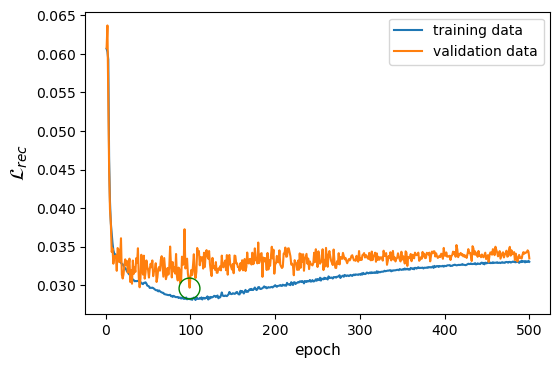

In [3]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{L}_{rec}$', fontsize=14)

plt.plot(df_train_history.index+1, df_train_history['mse_loss'], label='training data')
plt.plot(df_train_history.index+1, df_train_history['val_mse_loss'], label='validation data')

plt.legend()

# Circle the minimum point of $\mathcal{L}_{rec,valid}$.
ckpt = np.argmin(df_train_history['val_mse_loss'])
plt.plot(ckpt, df_train_history['val_mse_loss'][ckpt], 'o', ms=15, mec='g', mfc='none', mew=1)

### *Plot the adversarial loss $\mathcal{L}_{adv}$.*
$\mathcal{L}_{adv}=0.62694251537323$ on validation data when epoch=46, which is close to $-\mathrm{ln}(0.5)=0.6931471805599453$.  
The two figures below show that $\mathcal{L}_{adv}$ also saturates at $-\mathrm{ln}(0.5)$ near epoch=99, indicating that the generator and discriminator are in balance.

Text(0.08, 0.9, '(a)')

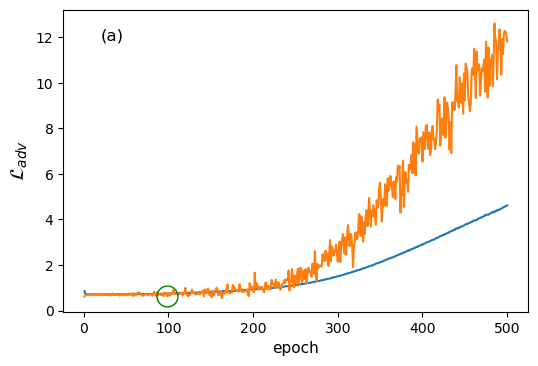

In [4]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{L}_{adv}$', fontsize=14)

plt.plot(df_train_history.index+1, df_train_history['adversarial_loss'])
plt.plot(df_train_history.index+1, df_train_history['val_adversarial_loss'])

# Circle the point where $\mathcal{L}_{rec,valid}$ is minimum.
plt.plot(ckpt, df_train_history['val_adversarial_loss'][ckpt], 'o', ms=15, mec='g', mfc='none', mew=1)

plt.annotate('(a)', (0.08, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.08, 0.9, '(b)')

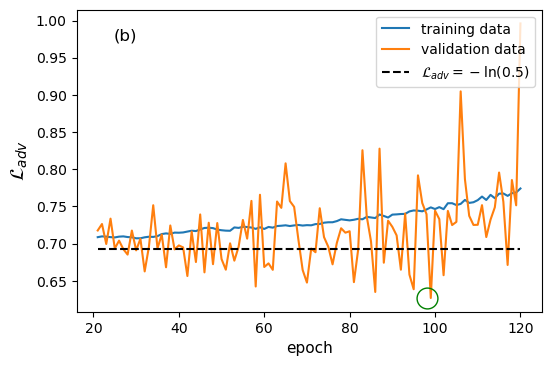

In [5]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{L}_{adv}$', fontsize=14)

plt.plot(df_train_history.index[20:120]+1, df_train_history['adversarial_loss'][20:120], label='training data')
plt.plot(df_train_history.index[20:120]+1, df_train_history['val_adversarial_loss'][20:120], label='validation data')

# The line $\mathcal{L}_{adv}=-\mathrm{ln}(0.5)$
plt.plot([21,120], [-np.log(0.5),-np.log(0.5)], '--k', label='$\mathcal{L}_{adv}=-\mathrm{ln}(0.5)$')

# Circle the point where $\mathcal{L}_{rec,valid}$ is minimum.
plt.plot(ckpt, df_train_history['val_adversarial_loss'][ckpt], 'o', ms=15, mec='g', mfc='none', mew=1)

plt.legend(loc='upper right')
plt.annotate('(b)', (0.08, 0.9), xycoords='axes fraction', fontsize=12)

### *Plot the generator loss $\mathcal{L}_{G}=(1-\lambda_{adv})\mathcal{L}_{rec}+\lambda_{adv}\mathcal{L}_{adv}$.*

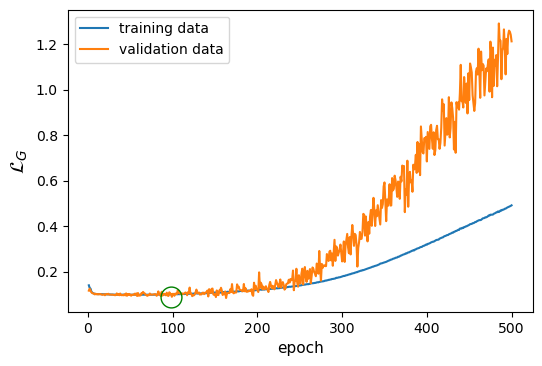

In [6]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('epoch', fontsize=11)
plt.ylabel('$\mathcal{L}_{G}$', fontsize=14)

plt.plot(df_train_history.index+1, df_train_history['gen_loss'], label='training data')
plt.plot(df_train_history.index+1, df_train_history['val_gen_loss'], label='validation data')

plt.legend()

# Circle the point where $\mathcal{L}_{rec,valid}$ is minimum.
plt.plot(ckpt, df_train_history['val_gen_loss'][ckpt], 'o', ms=15, mec='g', mfc='none', mew=1)